In [ ]:


import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import sklearn.model_selection as ms
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler


#  Simple PCA

In [ ]:
def get_cov_mat(X):
  """
  Returns a covariance matrix of the given input matrix
  
  Args:
      X ((n,p) np.ndarray): The input data
  Returns:
      X_cov ((p,p) np.ndarray): The input data
  """  
  
  p = X.shape[1]  
  
  eig_vecs_sorted = np.zeros((p,p))

  X_cov=np.cov(X.T)
  
  assert X_cov.shape == (p,p)
  
  return X_cov


def get_eig(cov_mat):
  """
  Returns an eigenvectors and eigenvalues in sorted order by eigenvalue
  given input covariance matrix
  
  Args:
      cov_mat ((p,p) np.ndarray): The input covariance matrix
  Returns:
      eig_vals_sorted ((p,) np.ndarray): Eigenvalues in decreasing order
      eig_vecs_sorted ((p,p) np.ndarray): Eigenvectors corresponding to the 
                                          sorted eigenvalues, eig_vecs_sorted[:, i]
                                          corresponds to the ith vector
                                          (i.e. each column is an eigenvector)
  """  
  
  p = cov_mat.shape[1]
  eig_vals_sorted = np.zeros(p)
  eig_vecs_sorted = np.zeros((p,p))
  eig_vals_sorted=np.linalg.eig(cov_mat)[0] 
  eig_vecs_sorted=(np.linalg.eig(cov_mat)[1]).T 
  
  
  assert eig_vals_sorted.shape == (p,)  
  assert eig_vecs_sorted.shape == (p,p)  
    
  return eig_vals_sorted, eig_vecs_sorted.T
  
    
def get_projection(X, principal_components):
  """
  Returns the projection of X onto the principal components
  
  Args:
      X ((n,p) np.ndarray): The input data
      principal_components ((p,p) np.ndarray): Principal components of data
  Returns:
      projection ((n,p) np.ndarray): The projection of X onto the components
  """  

  n = X.shape[0]
  p = X.shape[1]

  projection = np.zeros((n,p))

  
  projection=(principal_components.dot(X.T).T)

  assert projection.shape == (n,p)

  return projection

In [ ]:
def pca(X):
  """
  Performs PCA on dataset X.
  
  Args:
    X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                          p (number of features) matrix                 
  
  Returns:
    projected ((n, p) np.ndarray): Samples projected on reduced dimensions
    values ((p,) np.ndarray): Singular Values
    components ((p, p) np.ndarray): Principal Components (also eigenvectors)
  """

  n = X.shape[0]
  p = X.shape[1]

  projection = np.zeros((n,p))
  components = np.zeros((p,p))
  values = np.zeros(p)

  values=get_eig(get_cov_mat(X))[0]
  components=get_eig(get_cov_mat(X))[1]
  projection=get_projection((X ),get_eig(get_cov_mat((X )))[1])

  assert projection.shape == (n,p)
  assert values.shape == (p,)
  assert components.shape == (p,p)

  return projection, components, values

In [ ]:


data = load_wine().data[:, [0, 12]]
# X = data
X = StandardScaler().fit_transform(data)

In [ ]:


X_mean = np.mean(X, axis=0)
projected, components, values = pca(X - X_mean)
print(components)
print(values)


[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[1.65300659 0.35829284]


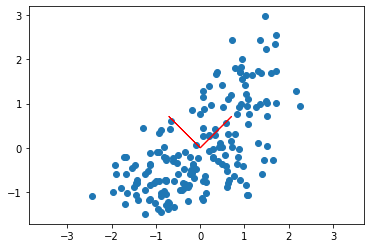

In [ ]:


mean_vec = np.mean(X, axis=0)

plt.arrow(mean_vec[0], mean_vec[1], components[0, 0], components[1, 0], ec='red')
plt.arrow(mean_vec[0], mean_vec[1], components[0, 1], components[1, 1], ec='red')
plt.axis('equal')
plt.scatter(X[:, 0], X[:, 1])

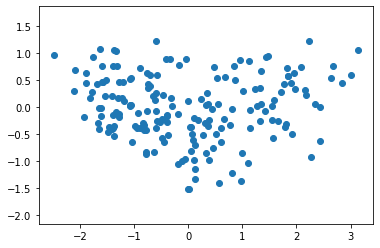

In [ ]:

plt.axis('equal')
plt.scatter(projected[:, 0], projected[:, 1])

# Eigenfaces

In [ ]:


from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state = 10)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:


n_samples, h, w = faces.images.shape
X_images = faces.data
y_names = faces.target
n_features = X_images.shape[1]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)


Total dataset size:
n_samples: 400
n_features: 4096


### PCA with SVD


In [ ]:
def pca2(X, n_pc):
  """
  Performs PCA on dataset X
  
  Args:
    X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                          p (number of features) matrix                 
    n_pc: The number of principal components
  
  Returns:
    projected ((n, min(n, n_pc)) np.ndarray): Samples projected on reduced dimensions
    components ((n_pc, p) np.ndarray): Principal Components (also eigenvectors)
    values ((min(n, n_pc),) np.ndarray): Singular Values    
    mean ((p,) np.ndarray): Mean of features
    centered_data ((n, p) np.ndarray): Data with the mean subtracted
  """
  
  n, p = X.shape
  
  projected = np.zeros((n, n_pc))
  components = np.zeros((n_pc, p))
  values = np.zeros(n_pc,)
  mean = np.zeros(p,)
  centered_data = np.zeros((n,p))

  mean = np.mean(X, axis=0)
  centered_data=X-mean
  U, Sigma, Vt = np.linalg.svd(X, full_matrices=False,  compute_uv=True)
  values=Sigma[0:n_pc]
  components=Vt[0:n_pc,]
  projected=(components.dot(X.T).T)


  
  # assert projected.shape == (n, min(n, n_pc))  
  # assert components.shape == (n_pc, p)  
  # assert values.shape == (min(n, n_pc),)
  # assert mean.shape == (p,)  
  # assert centered_data.shape == (n, p)    

  return projected, components, values, mean, centered_data


## Helper functions

In [ ]:
def plot_portraits(images, titles, h, w, n_row, n_col):
  """
  Plots portraits of images
  
  Args:
    images ((n,p) np.ndarray): The input images in a vector format
    titles (list string): The list of names for each image
    h (int): The input height of the portraits
    w (int): The input height of the portraits
    n_row (int): The number of rows to display of images
    n_col (int): The number of columns to display of images
  """  
  
  plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
  for i in range(n_row * n_col):
      plt.subplot(n_row, n_col, i + 1)
      plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
      plt.title(titles[i])
      plt.xticks(())
      plt.yticks(())

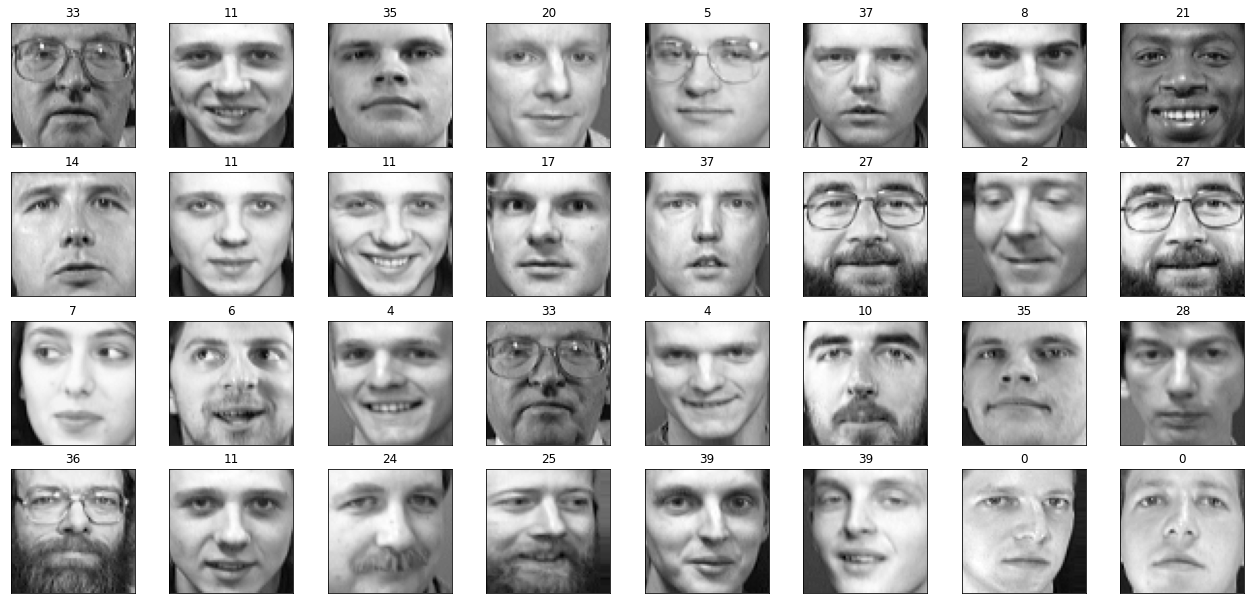

In [ ]:


plot_portraits(X_images, y_names, h, w, n_row=4, n_col=8)

Now run the script below that takes the image matrix of n rows by h*w features and runs PCA on this X with 50 components and plot the images of the eigenvectors (which you will have to unwrap back into the image shape.)

[717.22144    67.45447    50.51128    40.18347    36.337997   31.587267
  28.261559   25.883537   25.282427   22.976562   22.570139   21.370583
  19.891888   19.64373    18.413118   17.728699   17.235569   16.605778
  15.481945   15.372439   15.00716    13.956638   13.748118   13.543636
  13.131219   12.970289   12.737966   12.521456   12.087672   11.825196
  11.336841   11.104654   10.809245   10.313552   10.2562      9.98849
   9.9054575   9.731228    9.437731    9.30091     9.1137495   8.957208
   8.871364    8.763132    8.700964    8.532653    8.438326    8.3751545
   8.182666    8.051714 ]


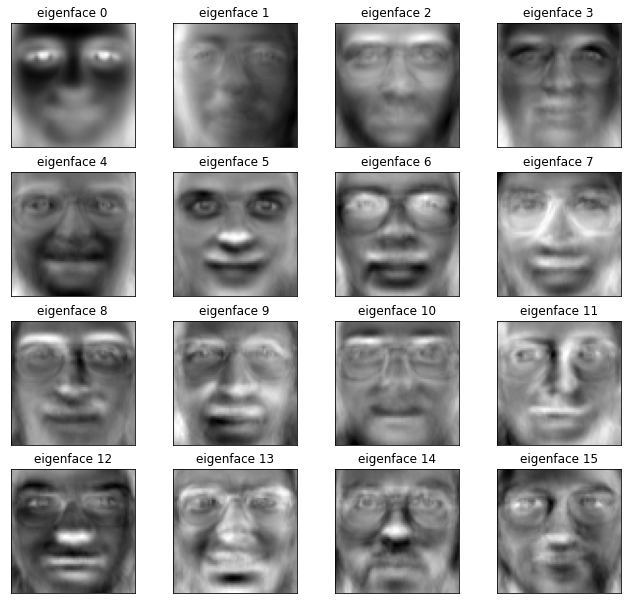

In [ ]:


n_components = 50
P, C, V, M, Y = pca2(X_images, n_components)

eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4)

print(V)

## Reconstructing faces
Now implement a function to reconstruct a face given projected data points

In [ ]:
def reconstruction(P, C, M, h, w, image_index):
  """
  Reconstructs an image with the given components
  
  Args:
    P, projected ((n, n_pc) np.ndarray): Samples projected on reduced dimensions
    C, components ((n_pc, p) np.ndarray): Principal Components (also eigenvectors)
    M, mean ((p,) np.ndarray): Mean of features
    h (int): The input height of the portraits
    w (int): The input height of the portraits
    image_index (int):  The index of the image in the projected data matrix
    
  Returns:
    recovered_image ((h, w) np.ndarray): Reconstructed image from the inputs
  """    
  
  recovered_image= (np.diag(P[image_index,]).dot(C)).sum(axis=0) 

  return recovered_image


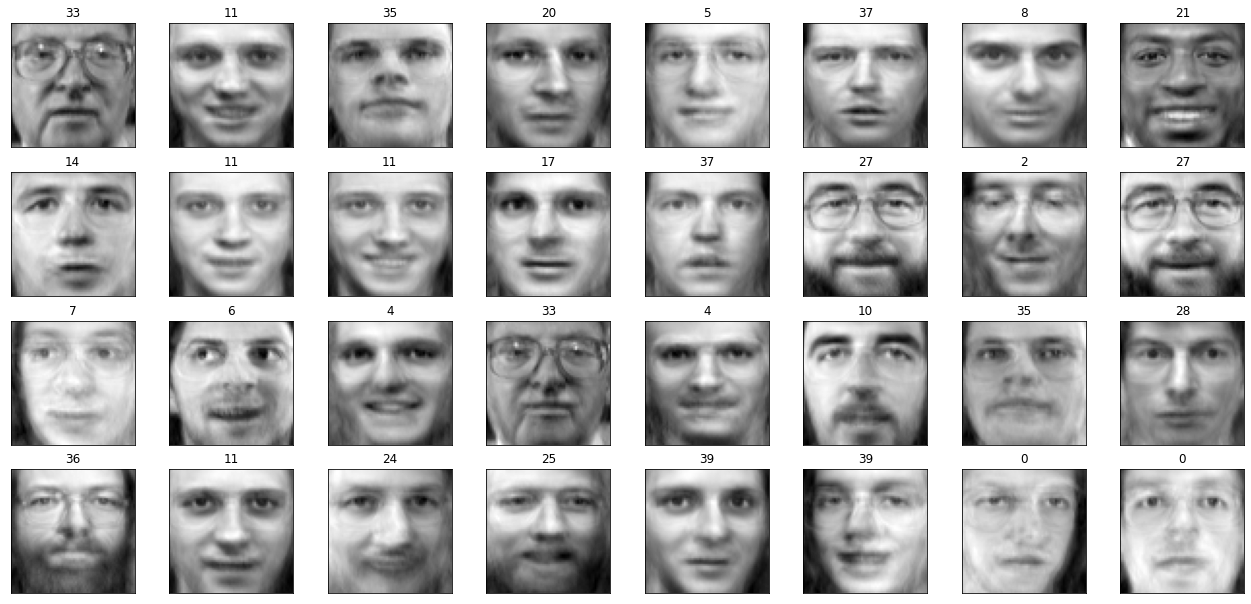

In [ ]:
"""
Please remember to comment out this code before downloading your .py file.
"""

recovered_images=[reconstruction(P, C, M, h, w, i) for i in range(len(X_images))]
plot_portraits(recovered_images, y_names, h, w, n_row=4, n_col=8)

## Explanation of Variance and Reconstruction Error

In [ ]:


P, C, eig_vals, M, Y = pca2(X_images, n_features)

reconst_errors = []
for i in range(X_images.shape[0]):
  dist = 0
  for j in range(50):    
    reconst_img = reconstruction(P[:, :i+1], C[:i+1, :], M, h, w, j)
    dist += np.linalg.norm(np.array(reconst_img).flatten() - np.array(X_images[j]))
  reconst_errors.append(dist/20)

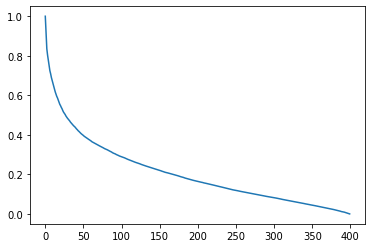

In [ ]:


plt.plot(reconst_errors/reconst_errors[0])

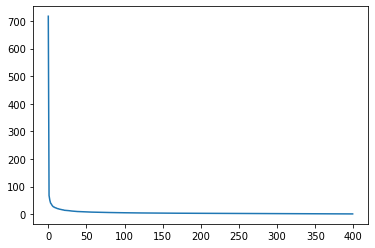

In [ ]:


plt.plot(eig_vals)

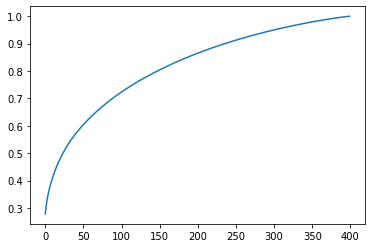

In [ ]:


tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.plot(cum_var_exp)